In [1]:
import pandas as pd

In [2]:
import os

In [17]:
df1 = pd.read_csv("./exe_analysis/malware/output.csv")

In [28]:
import pefile

In [29]:
import ssdeep

In [31]:
m1 = df1.loc[:,["Exe name", "Family", "ssdeep"]]

m1.head()

In [34]:
cp.head()

,Exe name_x,Family,ssdeep_x,Exe name_y,ssdeep_y
0,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,teslacrypt,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...
1,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,teslacrypt,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...,385d3bb08535d11f65e2927e2c08a03b95559c0f6e260a...,6144:f5RZQR7Xr2JKP5IaW2y5hX4Oc9s+Qw9dJLfV3Nc61...
2,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,teslacrypt,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...,c2c2e331f66ec54eab037c06f5d9fa3c5c08a233419b14...,12288:QeAgFS3l1X9pyQtePcO3JKKDblCJxfS6:Bu1X9De...
3,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,teslacrypt,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...,179c8ec8f48a067084ad55e96c226d3587cada5da368a8...,12288:poVKrSrl8s2VEqCf0xjq73Pjp0cX+ilVU:PrW2G7...
4,92afdb24daeb9f592677f59cd457e649e23ca63f1e6542...,teslacrypt,6144:3qHkrjX5vxU5QZZvH3K++Wv9CN4Jz4sH63BAayKPq...,d4332aebc11651737926deb502759bb69f3d331a0ef9b2...,6144:zaWVYqfPGyCYvuC7vhtGTmKdIPavzN9dI5Gqo:zaW...


In [55]:
import re

In [61]:
m1['ssdeep'].to_csv("to_check.csv")

In [73]:
cp['Similarity'] = cp.apply(lambda x: ssdeep.compare(str(x['ssdeep_x']),str(x['ssdeep_y'])),axis=1)

In [75]:
UniqueFamilies = cp.Family.unique()

In [79]:
df_dict={el: pd.DataFrame() for el in UniqueFamilies}

In [80]:
for family in UniqueFamilies:
    df_dict[family] = cp[:][cp.Family == family]

In [81]:
locky = df_dict['locky'].pivot(index="Exe name_x", columns="Exe name_y", values="Similarity")

In [82]:
locky.head()

Exe name_y,0018bc9f3e36c70fd4abf0171a5be8edcedc79b86ab19884438d6560870af59f,0045a8f95a7c6d204b42f003bc4779293ba32abccfbc34bb4c81badbe768d975,00ed72ffa97f75e1f4d1769e25f94614dbf3fe2a468361b3511a7c0b10ba9038,0116ab9e124e84ba324f2560b882491970d0861216b542cb0ba691780ffea4a2,012a23fc7bab2e5f4c3656d0574e70b47add09b2cdbe40dc33e45393bb4180c5,01722a55b090ab9e13cfae2b6ed0d9ed53199f430eabb7572441b94ade623834,017c1050e8ed1dbff0e05d617701ac25264f890b97181041b56d19b14b01229f,029267049e4495414a36adb7383a0602c49285d98e4e261d290171994ca8d3bb,02be6fcee1107b3b0cc6c325203a946362b410bfb9933fd4998897800bf5142f,02cdac1d4c67c3b3b02bb969ac19646d9857d5d511109f12628ba7aba69ce6ca,...,fcfbbde6237b35acae693462da15240d0419802674443de1f38dd49c3193fb64,fd08ed15fbb2536908a0018b68c30f5ae0ba2baa2835d785db922a7178a0639d,fdbbe50061784f2ffa59ce77cdf267a14a0e6fc624d73ca46320e933137d25ee,fdd5325bd1371068d7948d57e640cd01869e5281e1e15eeddafa20448618a89d,fe4188733a8e365dad12dab059a9b18b4b01f119dd37eb906d9f018fe02866b8,fe621e0157e6eccf323a6ab9616277f7bcf437704a1bf5aa889ffae96d2460a9,fe9e7ce46ea6ab100e089d009f1e8eabd874471b7505521150ea29ebeb39a2ae,feeeadabca104f5fad1acafe6b164a485c732c69c5852874784a97d5a761f0b3,ff1ecbe26efaa9fc1935f4e73ababfc1e21a75ba28928499f78b9adf0a01a11c,fff5023f3146fa72fcaa2b9114b182345ec64297aa5aab76937c2c320b7237e2
Exe name_x,,,,,,,,,,,,,,,,,,,,,
0018bc9f3e36c70fd4abf0171a5be8edcedc79b86ab19884438d6560870af59f,100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0045a8f95a7c6d204b42f003bc4779293ba32abccfbc34bb4c81badbe768d975,0,100,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00ed72ffa97f75e1f4d1769e25f94614dbf3fe2a468361b3511a7c0b10ba9038,0,0,100,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0116ab9e124e84ba324f2560b882491970d0861216b542cb0ba691780ffea4a2,0,0,0,100,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
012a23fc7bab2e5f4c3656d0574e70b47add09b2cdbe40dc33e45393bb4180c5,0,0,0,0,100,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
import matplotlib.pyplot as plt

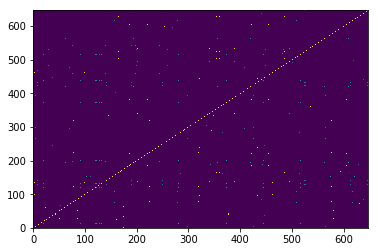

In [86]:
ax = plt.pcolor(locky)

In [87]:
fig = ax.get_figure()

In [88]:
fig.savefig("locky_heatmap")

In [89]:
locky.to_csv("locky_heatmap.csv")

In [90]:
zusy = df_dict['zusy'].pivot(index= "Exe name_x", columns= "Exe name_y", values="Similarity")

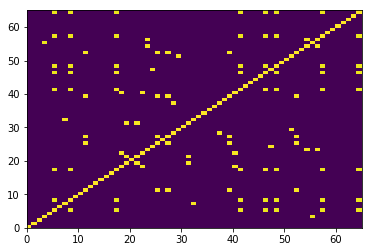

In [91]:
ay = plt.pcolor(zusy)

In [92]:
fig_zusy= ay.get_figure()

In [93]:
fig_zusy.savefig("zusy_heatmap")

In [94]:
zusy.to_csv("zusy_heatmap.csv")